# sigma_v_h1s_hn_hp
$e+H_2^{+}\rightarrow H(1s)+H^{*}(n)$

<sigma V> for Te=100 eV: 3.4535127938906287e-15 m^3/s


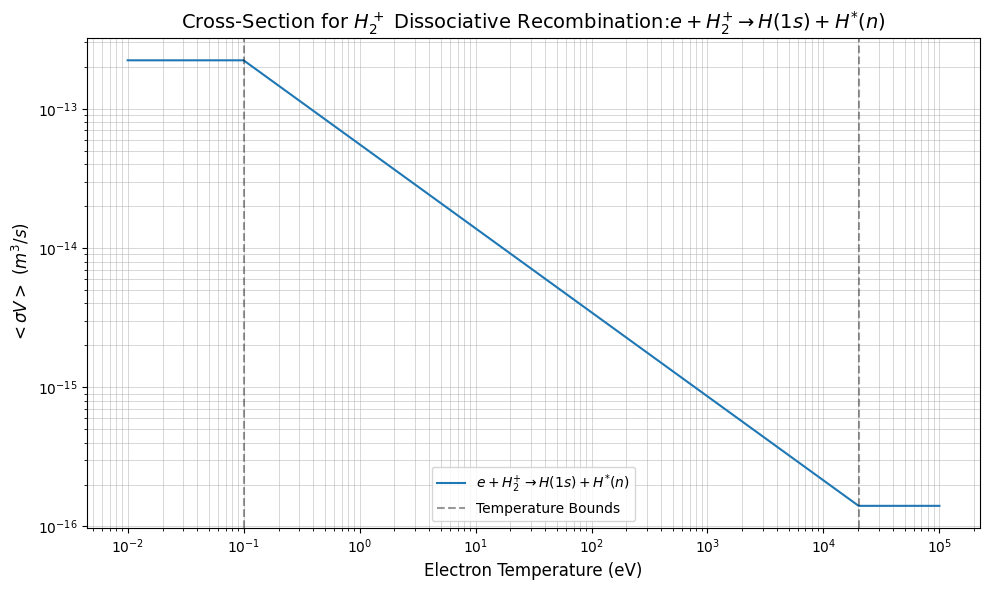

In [15]:
import numpy as np

def sigma_v_h1s_hn_hp(Te):
    """
    Returns Maxwellian-averaged <sigma V> for electron impact dissociative recombination of molecular hydrogen ions,
    resulting in one H atom in the 1s state and one H atom in state n >= 2. Coefficients are taken from Janev,
    "Elementary Processes in Hydrogen-Helium Plasmas", Springer-Verlag, 1987, p.260.

    Parameters:
        Te (float or array-like): Electron temperature in eV. Must be within the range [0.1, 2e4] eV.

    Returns:
        float or numpy.ndarray: Maxwellian-averaged <sigma V> in m^3/s.
                                For temperatures outside the valid range, the boundary values are returned.
    """
    # Ensure Te is a NumPy array and clip to valid temperature range
    Te = np.asarray(Te, dtype=np.float64)
    Te = np.clip(Te, 0.1, 2.01e4)

    # Coefficients for the polynomial expansion
    b = np.array([
        -1.670435653561e+1,        -6.035644995682e-1,        -1.942745783445e-8,
        -2.005952284492e-7,         2.962996104431e-8,         2.134293274971e-8,
        -6.353973401838e-9,         6.152557460831e-10,       -2.025361858319e-11
    ])

    # Compute the Maxwellian-averaged <sigma V> using the polynomial expansion
    sigma_v = np.exp(np.polyval(b[::-1], np.log(Te))) * 1e-6

    return sigma_v

# Example usage
if __name__ == '__main__':
    # Test with a scalar value
    Te_scalar = 100  # Example electron temperature in eV
    print(f"<sigma V> for Te={Te_scalar} eV: {sigma_v_h1s_hn_hp(Te_scalar)} m^3/s")

    # Test with an array of temperatures
    Te_array = np.logspace(-2, 5, 1000)  
    result = sigma_v_h1s_hn_hp(Te_array)

    # Plot the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(Te_array, result, label=r'$e+H_2^{+}\rightarrow H(1s)+H^{*}(n)$')
    plt.axvline(0.1, color='k', linestyle='--', alpha=0.4, label='Temperature Bounds')
    plt.axvline(2.01e4, color='k', linestyle='--', alpha=0.4)
    plt.title(r'Cross-Section for $H_2^+$ Dissociative Recombination:$e+H_2^{+}\rightarrow H(1s)+H^{*}(n)$', fontsize=14)
    plt.xlabel('Electron Temperature (eV)', fontsize=12)
    plt.ylabel(r'$<\sigma V>$ ($m^3/s$)', fontsize=12)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

# sigma_v_h1s_hn3_hh
$ e+ H_2 \rightarrow e+ H(1s) + H^{*}(n=3)$

Results for Te=100 eV:
  <sigma V>: 7.62158110881217e-16 m^3/s
  E0_ave: 2.5 eV
  E0_min: 3.75 eV
  E0_max: 1.25 eV


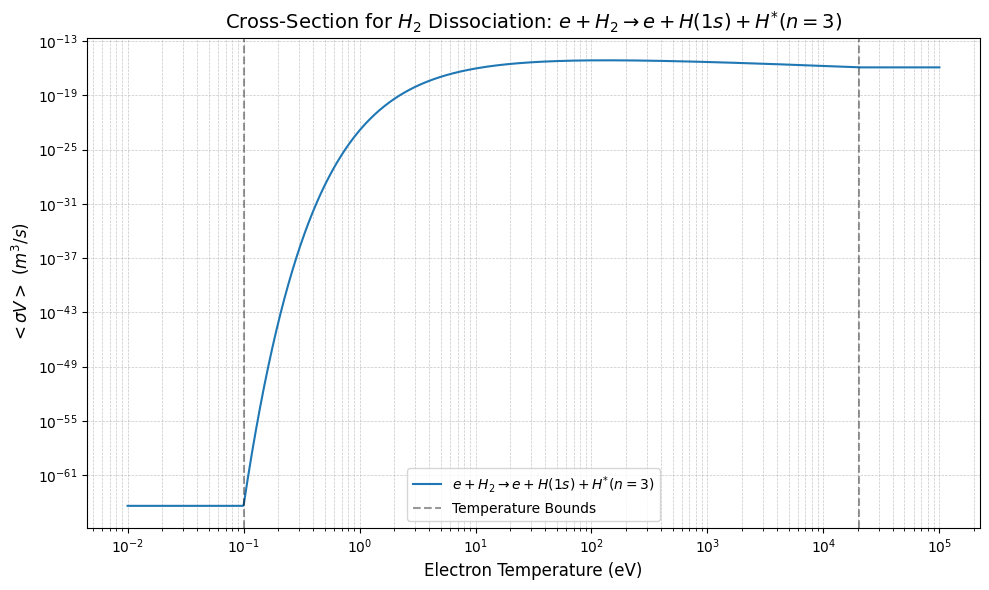

In [16]:
import numpy as np

def sigma_v_h1s_hn3_hh(Te):
    """
    Returns Maxwellian-averaged <sigma V> for electron impact dissociation of molecular hydrogen,
    resulting in one H atom in the 1s state and one H atom in the n=3 state. Coefficients are taken from Janev,
    "Elementary Processes in Hydrogen-Helium Plasmas", Springer-Verlag, 1987, p.259.

    Also returns minimum, maximum, and average energy of the resultant H(1s) and H(n=3) atoms.

    Parameters:
        Te (float or array-like): Electron temperature in eV. Must be within the range [0.1, 2e4] eV.

    Returns:
        dict: A dictionary containing:
            - 'sigma_v': Maxwellian-averaged <sigma V> in m^3/s.
            - 'E0_ave': Average energy of H(1s) and H(n=3) atoms (eV).
            - 'E0_min': Minimum energy of H(1s) and H(n=3) atoms (eV).
            - 'E0_max': Maximum energy of H(1s) and H(n=3) atoms (eV).
    """
    # Ensure Te is a NumPy array and clip to valid temperature range
    Te = np.asarray(Te, dtype=np.float64)
    Te = np.clip(Te, 0.1, 2.01e4)

    # Coefficients for the polynomial expansion
    b = np.array([
        -3.884976142596e+1,         1.520368281111e+1,        -6.078494762845e+0,
         1.535455119900e+0,        -2.628667482712e-1,         2.994456451213e-2,
        -2.156175515382e-3,         8.826547202670e-5,        -1.558890013181e-6
    ])

    # Compute the Maxwellian-averaged <sigma V> using the polynomial expansion
    sigma_v = np.exp(np.polyval(b[::-1], np.log(Te))) * 1e-6

    # Energy values for the resultant particles (constant as per the IDL code)
    E0_ave = 2.5  # Average energy (eV)
    E0_min = 3.75  # Minimum energy (eV)
    E0_max = 1.25  # Maximum energy (eV)

    # Return results as a dictionary
    return {
        'sigma_v': sigma_v,
        'E0_ave': E0_ave,
        'E0_min': E0_min,
        'E0_max': E0_max
    }

# Example usage
if __name__ == '__main__':
    # Test with a scalar value
    Te_scalar = 100  # Example electron temperature in eV
    result_scalar = sigma_v_h1s_hn3_hh(Te_scalar)
    print(f"Results for Te={Te_scalar} eV:")
    print(f"  <sigma V>: {result_scalar['sigma_v']} m^3/s")
    print(f"  E0_ave: {result_scalar['E0_ave']} eV")
    print(f"  E0_min: {result_scalar['E0_min']} eV")
    print(f"  E0_max: {result_scalar['E0_max']} eV")

    # Test with an array of temperatures
    Te_array = np.logspace(-2, 5, 1000)  
    result_array = sigma_v_h1s_hn3_hh(Te_array)

    # Plot the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(Te_array, result_array['sigma_v'], label=r'$ e+ H_2 \rightarrow e+ H(1s) + H^{*}(n=3)$')
    plt.axvline(0.1, color='k', linestyle='--', alpha=0.4, label='Temperature Bounds')
    plt.axvline(2.01e4, color='k', linestyle='--', alpha=0.4)
    plt.title(r'Cross-Section for $H_2$ Dissociation: $e+ H_2 \rightarrow e+ H(1s) + H^{*}(n=3)$', fontsize=14)
    plt.xlabel('Electron Temperature (eV)', fontsize=12)
    plt.ylabel(r'$<\sigma V>$ ($m^3/s$)', fontsize=12)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

# sigma_v_h1s_h1s_hh
The coefficients for this reaction were not found in the indicated books.\
This led us to question its correctness: Where did this data come from?
I pressume that the reaction is:\
$e+ H_2 \rightarrow e + H(1s) + H(1s)$

Results for Te=100 eV:
  <sigma V>: 2.8859370370320397e-15 m^3/s
  E0_ave: 3.0 eV
  E0_min: 2.0 eV
  E0_max: 4.25 eV


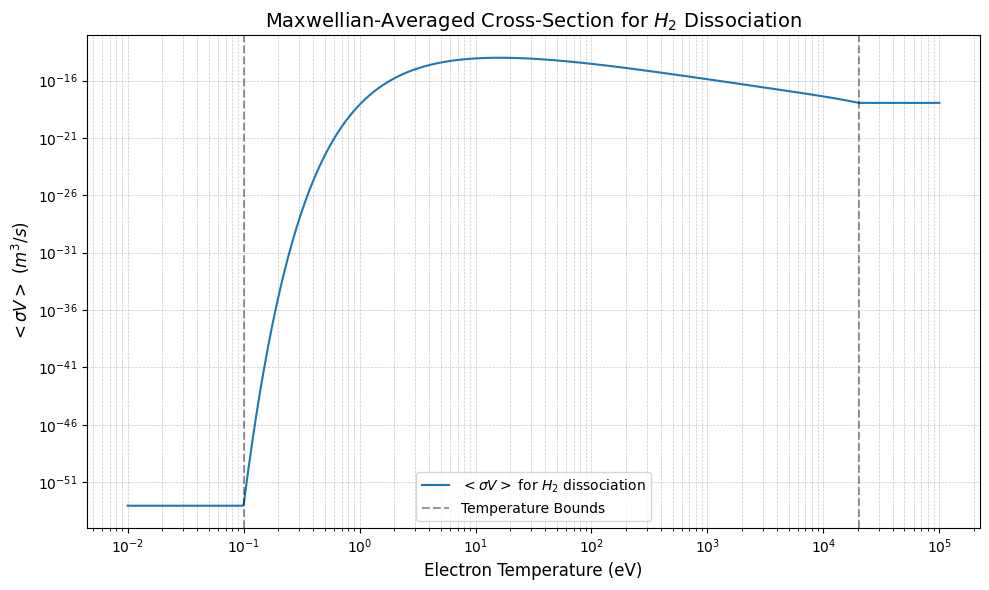

In [40]:
import numpy as np

def sigma_v_h1s_h1s_hh(Te):
    """
    Returns Maxwellian-averaged <sigma V> for electron impact dissociation of molecular hydrogen,
    resulting in two H atoms in the 1s state. Coefficients are taken from Janev,
    "Elementary Processes in Hydrogen-Helium Plasmas", Springer-Verlag, 1987, p.259.

    Also returns minimum, maximum, and average energy of the resultant H(1s) atoms.

    Parameters:
        Te (float or array-like): Electron temperature in eV. Must be within the range [0.1, 2e4] eV.

    Returns:
        dict: A dictionary containing:
            - 'sigma_v': Maxwellian-averaged <sigma V> in m^3/s.
            - 'E0_ave': Average energy of H(1s) atoms (eV).
            - 'E0_min': Minimum energy of H(1s) atoms (eV).
            - 'E0_max': Maximum energy of H(1s) atoms (eV).
    """
    # Ensure Te is a NumPy array and clip to valid temperature range
    Te = np.asarray(Te, dtype=np.float64)
    Te = np.clip(Te, 0.1, 2.01e4)

    # Coefficients for the polynomial expansion (Data from ¿?)
    b = np.array([
        -2.787217511174e+1,         1.052252660075e+1,        -4.973212347860e+0,
         1.451198183114e+0,        -3.062790554644e-1,         4.433379509258e-2,
        -4.096344172875e-3,         2.159670289222e-4,        -4.928545325189e-6
    ])
    # Data from  p. 259, Reaction 2.2.5
    # b = np.array([
    #     -2.858072836568e+01,  1.038543976082e+01, -5.383825026583e+00,
    #      1.950636494405e+00, -5.393666392407e-01,  1.006916814453e-01,
    #     -1.160758573972e-02,  7.411623859122e-04, -2.00136918807e-05
    # ])

    # Compute the Maxwellian-averaged <sigma V> using the polynomial expansion
    sigma_v = np.exp(np.polyval(b[::-1], np.log(Te))) * 1e-6

    # Energy values for the resultant particles (constant as per the IDL code)
    E0_ave = 3.0   # Average energy (eV)
    E0_min = 2.0   # Minimum energy (eV)
    E0_max = 4.25  # Maximum energy (eV)

    # Return results as a dictionary
    return {
        'sigma_v': sigma_v,
        'E0_ave': E0_ave,
        'E0_min': E0_min,
        'E0_max': E0_max
    }

# Example usage
if __name__ == '__main__':
    # Test with a scalar value
    Te_scalar = 100  # Example electron temperature in eV
    result_scalar = sigma_v_h1s_h1s_hh(Te_scalar)
    print(f"Results for Te={Te_scalar} eV:")
    print(f"  <sigma V>: {result_scalar['sigma_v']} m^3/s")
    print(f"  E0_ave: {result_scalar['E0_ave']} eV")
    print(f"  E0_min: {result_scalar['E0_min']} eV")
    print(f"  E0_max: {result_scalar['E0_max']} eV")

    # Test with an array of temperatures
    Te_array = np.logspace(-2, 5, 1000)  
    result_array = sigma_v_h1s_h1s_hh(Te_array)

    # Plot the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(Te_array, result_array['sigma_v'], label=r'$<\sigma V>$ for $H_2$ dissociation')
    plt.axvline(0.1, color='k', linestyle='--', alpha=0.4, label='Temperature Bounds')
    plt.axvline(2.01e4, color='k', linestyle='--', alpha=0.4)
    plt.title('Maxwellian-Averaged Cross-Section for $H_2$ Dissociation', fontsize=14)
    plt.xlabel('Electron Temperature (eV)', fontsize=12)
    plt.ylabel(r'$<\sigma V>$ ($m^3/s$)', fontsize=12)
    plt.xscale('log')
    plt.yscale('log')
    # plt.ylim([1e-16,1e-6])
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

# sigma_v_h1s_h2s_hh
$e+H_2\rightarrow e + H(1s) + H^*(2s)$

Results for Te=100 eV:
  <sigma V>: 6.806766316602152e-15 m^3/s
  E0_ave: 0.3 eV
  E0_min: 0.0 eV
  E0_max: 0.55 eV


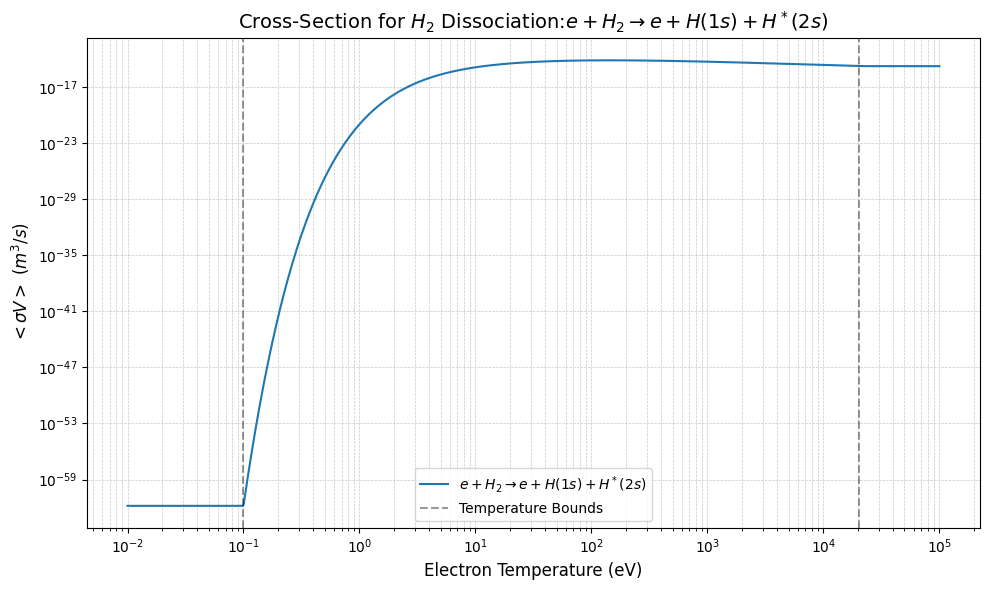

In [31]:
import numpy as np

def sigma_v_h1s_h2s_hh(Te):
    """
    Returns Maxwellian-averaged <sigma V> for electron impact dissociation of molecular hydrogen,
    resulting in one H atom in the 1s state and one H atom in the 2s state. Coefficients are taken from Janev,
    "Elementary Processes in Hydrogen-Helium Plasmas", Springer-Verlag, 1987, p.259.

    Also returns minimum, maximum, and average energy of the resultant H(1s) and H(2s) atoms.

    Parameters:
        Te (float or array-like): Electron temperature in eV. Must be within the range [0.1, 2e4] eV.

    Returns:
        dict: A dictionary containing:
            - 'sigma_v': Maxwellian-averaged <sigma V> in m^3/s.
            - 'E0_ave': Average energy of H(1s) and H(2s) atoms (eV).
            - 'E0_min': Minimum energy of H(1s) and H(2s) atoms (eV).
            - 'E0_max': Maximum energy of H(1s) and H(2s) atoms (eV).
    """
    # Ensure Te is a NumPy array and clip to valid temperature range
    Te = np.asarray(Te, dtype=np.float64)
    Te = np.clip(Te, 0.1, 2.01e4)

    # Coefficients for the polynomial expansion
    b = np.array([
        -3.454175591367e+1,         1.412655911280e+1,        -6.004466156761e+0,
         1.589476697488e+0,        -2.775796909649e-1,         3.152736888124e-2,
        -2.229578042005e-3,         8.890114963166e-5,        -1.523912962346e-6
    ])

    # Compute the Maxwellian-averaged <sigma V> using the polynomial expansion
    sigma_v = np.exp(np.polyval(b[::-1], np.log(Te))) * 1e-6

    # Energy values for the resultant particles (constant as per the IDL code)
    E0_ave = 0.3   # Average energy (eV)
    E0_min = 0.0   # Minimum energy (eV)
    E0_max = 0.55  # Maximum energy (eV)

    # Return results as a dictionary
    return {
        'sigma_v': sigma_v,
        'E0_ave': E0_ave,
        'E0_min': E0_min,
        'E0_max': E0_max
    }

# Example usage
if __name__ == '__main__':
    # Test with a scalar value
    Te_scalar = 100  # Example electron temperature in eV
    result_scalar = sigma_v_h1s_h2s_hh(Te_scalar)
    print(f"Results for Te={Te_scalar} eV:")
    print(f"  <sigma V>: {result_scalar['sigma_v']} m^3/s")
    print(f"  E0_ave: {result_scalar['E0_ave']} eV")
    print(f"  E0_min: {result_scalar['E0_min']} eV")
    print(f"  E0_max: {result_scalar['E0_max']} eV")

    # Test with an array of temperatures
    Te_array = np.logspace(-2, 5, 1000)  
    result_array = sigma_v_h1s_h2s_hh(Te_array)

    # Plot the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(Te_array, result_array['sigma_v'], label=r'$e+H_2\rightarrow e + H(1s) + H^*(2s)$')
    plt.axvline(0.1, color='k', linestyle='--', alpha=0.4, label='Temperature Bounds')
    plt.axvline(2.01e4, color='k', linestyle='--', alpha=0.4)
    plt.title(r'Cross-Section for $H_2$ Dissociation:$e+H_2\rightarrow e + H(1s) + H^*(2s)$', fontsize=14)
    plt.xlabel('Electron Temperature (eV)', fontsize=12)
    plt.ylabel(r'$<\sigma V>$ ($m^3/s$)', fontsize=12)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

# sigma_v_h2p_h2s_hh
$e+H_2\rightarrow e + H^*(2p) + H^*(2s)$

Results for Te=100 eV:
  <sigma V>: 1.2744395619984453e-15 m^3/s
  E0_ave: 4.85 eV
  E0_min: 2.85 eV
  E0_max: 5.85 eV


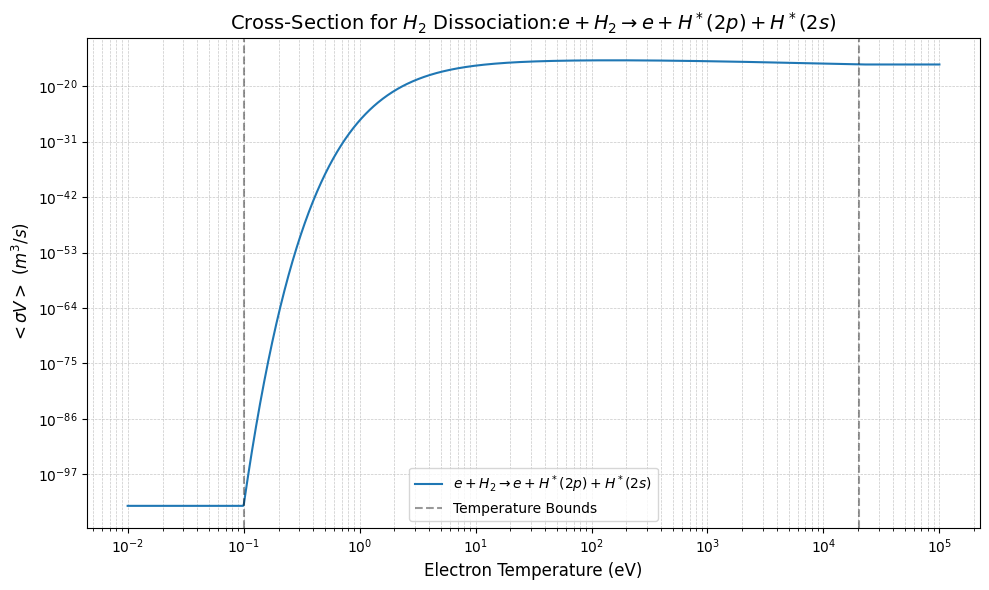

In [37]:
import numpy as np

def sigma_v_h2p_h2s_hh(Te):
    """
    Returns Maxwellian-averaged <sigma V> for electron impact dissociation of molecular hydrogen,
    resulting in one H atom in the 2p state and one H atom in the 2s state. Coefficients are taken from Janev,
    "Elementary Processes in Hydrogen-Helium Plasmas", Springer-Verlag, 1987, p.259.

    Also returns minimum, maximum, and average energy of the resultant H(2p) and H(2s) atoms.

    Parameters:
        Te (float or array-like): Electron temperature in eV. Must be within the range [0.1, 2e4] eV.

    Returns:
        dict: A dictionary containing:
            - 'sigma_v': Maxwellian-averaged <sigma V> in m^3/s.
            - 'E0_ave': Average energy of H(2p) and H(2s) atoms (eV).
            - 'E0_min': Minimum energy of H(2p) and H(2s) atoms (eV).
            - 'E0_max': Maximum energy of H(2p) and H(2s) atoms (eV).
    """
    # Ensure Te is a NumPy array and clip to valid temperature range
    Te = np.asarray(Te, dtype=np.float64)
    Te = np.clip(Te, 0.1, 2.01e4)

    # Coefficients for the polynomial expansion
    b = np.array([
        -4.794288960529e+1,         2.629649351119e+1,        -1.151117702256e+1,
         2.991954880790e+0,        -4.949305181578e-1,         5.236320848415e-2,
        -3.433774290547e-3,         1.272097387363e-4,        -2.036079507592e-6
    ])

    # Compute the Maxwellian-averaged <sigma V> using the polynomial expansion
    sigma_v = np.exp(np.polyval(b[::-1], np.log(Te))) * 1e-6

    # Energy values for the resultant particles (constant as per the IDL code)
    E0_ave = 4.85  # Average energy (eV)
    E0_min = 2.85  # Minimum energy (eV)
    E0_max = 5.85  # Maximum energy (eV)

    # Return results as a dictionary
    return {
        'sigma_v': sigma_v,
        'E0_ave': E0_ave,
        'E0_min': E0_min,
        'E0_max': E0_max
    }

# Example usage
if __name__ == '__main__':
    # Test with a scalar value
    Te_scalar = 100  # Example electron temperature in eV
    result_scalar = sigma_v_h2p_h2s_hh(Te_scalar)
    print(f"Results for Te={Te_scalar} eV:")
    print(f"  <sigma V>: {result_scalar['sigma_v']} m^3/s")
    print(f"  E0_ave: {result_scalar['E0_ave']} eV")
    print(f"  E0_min: {result_scalar['E0_min']} eV")
    print(f"  E0_max: {result_scalar['E0_max']} eV")

    # Test with an array of temperatures
    Te_array = np.logspace(-2, 5, 1000) 
    result_array = sigma_v_h2p_h2s_hh(Te_array)

    # Plot the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(Te_array, result_array['sigma_v'], label=r'$e+H_2\rightarrow e + H^*(2p) + H^*(2s)$')
    plt.axvline(0.1, color='k', linestyle='--', alpha=0.4, label='Temperature Bounds')
    plt.axvline(2.01e4, color='k', linestyle='--', alpha=0.4)
    plt.title(r'Cross-Section for $H_2$ Dissociation:$e+H_2\rightarrow e + H^*(2p) + H^*(2s)$', fontsize=14)
    plt.xlabel('Electron Temperature (eV)', fontsize=12)
    plt.ylabel(r'$<\sigma V>$ ($m^3/s$)', fontsize=12)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()